# Case - Análise de satisfação de clientes

## Introdução

Uma Instituição Financeira de grande porte necessita analisar a satisfação dos clientes com os serviços prestados pela empresa. Para tal, será necessário processar e analisar um grande volume de dados para obter insights valiosos sobre o que os clientes pensam sobre a empresa, suas necessidades e expectativas.

O dataset disponível é composto de dados provenientes de diversas fontes, como pesquisas de satisfação, registros de atendimento ao cliente, feedbacks nas redes sociais e reclamações registradas em plataformas de avaliação de empresas.

## Objetivo do projeto

Calcular as seguintes métricas para análise de negócios:

- Analisar NPS de classificação de cada instituição
- Calcular a % de elogios do app para cada instituição
- Calcular a % de reclamações do app para cada instituição
- Calcular a % de elogios a instituição para cada instituição
- Calcular a % de reclamação a instituição para cada instituição
- Plote um gráfico de linhas para entender a tendência das classificações por instituição


## Análise Descritiva dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importou-se o dataset disponível com a biblioteca Pandas.

In [2]:
clientes = pd.read_excel('Dados_Satisfacao.xlsx')

In [3]:
clientes.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco A,Muito bom ajuda muito,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
1,Banco A,excelente,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
2,Banco A,Bom,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
3,Banco A,aplicativo muito top,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
4,Banco A,Fácil e prático,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO


Analisando-se os dados acima, percebe-se que temos as seguintes colunas:
* Instituição = Nome da instituição ao qual pertence o cliente
* Comentario = Algum comentario em específico do cliente
* Data
* Classificação = nível de classificação de 1 a 5 atribuído pelo cliente
* Elogio quanto ao app
* Reclamação quanto ao app
* Elogio a Instituição
* Reclamação a Instituição
* Não Classificável

Avaliando-se as demais infos do dataset,

In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Comentario                8698 non-null   object        
 2   Data                      8702 non-null   datetime64[ns]
 3   Classificação             8702 non-null   int64         
 4   Elogio quanto ao app      8702 non-null   object        
 5   Reclamação quanto ao app  8702 non-null   object        
 6   Elogio a Instituição      8702 non-null   object        
 7   Reclamação a Instituição  8702 non-null   object        
 8   Não Classificável         8702 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 612.0+ KB


Percebe-se que temos a coluna 'Data' já especificada com dados do tipo data. Já as demais, tirando a coluna classificação, todas as outras tem dados dos tipo objeto, ou categórico.

Observando a questão dos dados nulos, tem-se que somente na coluna 'Comentario' existem dados nulos. Nas demais colunas, todas as entradas estão preenchidas. Contudo, sabendo-se que nesta coluna, a entrada de dados seria de um campo texto de digitação livre do cliente, é prudente apenas excluir tal coluna do dataset, conforme segue abaixo,

In [5]:
clientes.drop(labels = 'Comentario', axis = 1, inplace = True)

In [6]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Data                      8702 non-null   datetime64[ns]
 2   Classificação             8702 non-null   int64         
 3   Elogio quanto ao app      8702 non-null   object        
 4   Reclamação quanto ao app  8702 non-null   object        
 5   Elogio a Instituição      8702 non-null   object        
 6   Reclamação a Instituição  8702 non-null   object        
 7   Não Classificável         8702 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 544.0+ KB


Outro ponto importante, levando em consideração as boas práticas de codificação, é renomear as colunas, de tal forma a substituir o espaço no nome delas por underline "_".

In [7]:
clientes = clientes.rename(columns = lambda coluna: "_".join(coluna.split(" ")))

In [8]:
clientes.columns

Index(['Instituição', 'Data', 'Classificação', 'Elogio_quanto_ao_app',
       'Reclamação_quanto_ao_app', 'Elogio_a_Instituição',
       'Reclamação_a_Instituição', 'Não_Classificável'],
      dtype='object')

Avaliando-se agora os dados de cada coluna separadamente,

In [9]:
clientes['Instituição'].value_counts()

Instituição
Banco B    1741
Banco E    1741
Banco A    1740
Banco C    1740
Banco D    1740
Name: count, dtype: int64

Tem-se 5 instituições financeiras abrangidas dentro do dataset:
* Banco A
* Banco B
* Banco C
* Banco D
* Banco E

In [10]:
clientes['Classificação'].unique()

array([5, 4, 1, 3, 2], dtype=int64)

Coluna de 'Classificação', conforme previsto, abrange números de 1 a 5, sendo uma classificação de 1 a 2 como ruim, 3 é neutro, 4 e 5 bom/ótimo.

### Colunas categóricas

Avaliando-se as demais colunas categóricas do dataset.

In [11]:
clientes['Elogio_quanto_ao_app'].unique()

array(['SIM', 'NÃO', 'NAO'], dtype=object)

Observa-se que nesta coluna 'Elogio_quanto_ao_app', tem-se dados 'NÃO', 'NAO' e 'SIM'.

In [12]:
clientes['Reclamação_quanto_ao_app'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [13]:
clientes['Elogio_a_Instituição'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [14]:
clientes['Reclamação_a_Instituição'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [15]:
clientes['Não_Classificável'].unique()

array(['NÃO', 'SIM'], dtype=object)

Percebe-se que todas estas colunas apresentam dados 'SIM' ou 'NÃO' (exceto a coluna 'Elogio_quanto_ao_app' que tem dados 'NAO' também).

Para se ter uma melhor análise deste tipo de dado, é conveniente transformar estas respostas para tipos binários, ou seja, 1 e 0. As respostas que forem 'SIM' serão convertidas para 1 e 'NÃO' para 0.

In [16]:
for column in clientes.columns:
  if clientes[column].dtype == 'object' and column != 'Instituição':
    clientes[column] = clientes[column].apply(lambda x: 1 if x == 'SIM' else 0)

Avaliando-se agora as entradas das colunas,

In [17]:
clientes['Elogio_quanto_ao_app'].unique()

array([1, 0], dtype=int64)

In [18]:
clientes['Reclamação_quanto_ao_app'].unique()

array([0, 1], dtype=int64)

In [19]:
clientes['Elogio_a_Instituição'].unique()

array([0, 1], dtype=int64)

In [20]:
clientes['Reclamação_a_Instituição'].unique()

array([0, 1], dtype=int64)

In [21]:
clientes['Não_Classificável'].unique()

array([0, 1], dtype=int64)

Agora, todas estas colunas que antes tinham dados categóricos, agora tem entradas somente com 0 e 1.

In [22]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Data                      8702 non-null   datetime64[ns]
 2   Classificação             8702 non-null   int64         
 3   Elogio_quanto_ao_app      8702 non-null   int64         
 4   Reclamação_quanto_ao_app  8702 non-null   int64         
 5   Elogio_a_Instituição      8702 non-null   int64         
 6   Reclamação_a_Instituição  8702 non-null   int64         
 7   Não_Classificável         8702 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 544.0+ KB


## Calculando as métricas

### NPS de classificação de cada instituição

Adotou-se como regra para o cálculo do NPS o intervalo de -1 a 1, conforme as seguintes condições baseadas nas notas atribuídas pelos clientes:

* Notas 1 e 2 = -1 (Clientes Detratores)

* Nota 3 = 0 (Clientes neutros)

* Notas 4 e 5 = 1 (Clientes promotores)

Portanto, convertendo-se as notas da base de dados conforme as regras acima, temos:

In [ ]:
i = 0
for nota in clientes['Classificação']:
  if nota == 1 or nota == 2:
    nota = -1
    clientes['Classificação'][i] = nota
  elif nota == 3:
    nota = 0
    clientes['Classificação'][i] = nota
  else:
    nota = 1
    clientes['Classificação'][i] = nota
  i += 1

In [24]:
clientes['Classificação'].unique()

array([ 1, -1,  0], dtype=int64)

Convertidas as notas da coluna 'Classificação', agora cria-se um novo dataset das médias das notas de Classificação, agrupadas por Instituição.

In [25]:
nps_classificacao = round(clientes.groupby(by = 'Instituição')['Classificação'].agg('mean').sort_values(ascending = False).reset_index(), 3)
nps_classificacao['Classificação'] = nps_classificacao['Classificação']*100   # considerando os dados em porcentagem

In [26]:
nps_classificacao

,Instituição,Classificação
0,Banco A,78.2
1,Banco B,68.2
2,Banco E,58.5
3,Banco C,57.0
4,Banco D,42.4


Foi calculado a média de classificações para cada instituição e exibido o ranking da maior para a menor média. Conforme é possível observar acima, a Instituição com melhor média de classificação é o Banco A com 78,2% de média, seguido pelo Banco B, Banco E, Banco C e Banco D em último com 42,4% de média.

Plotando-se um gráfico do resultado acima,

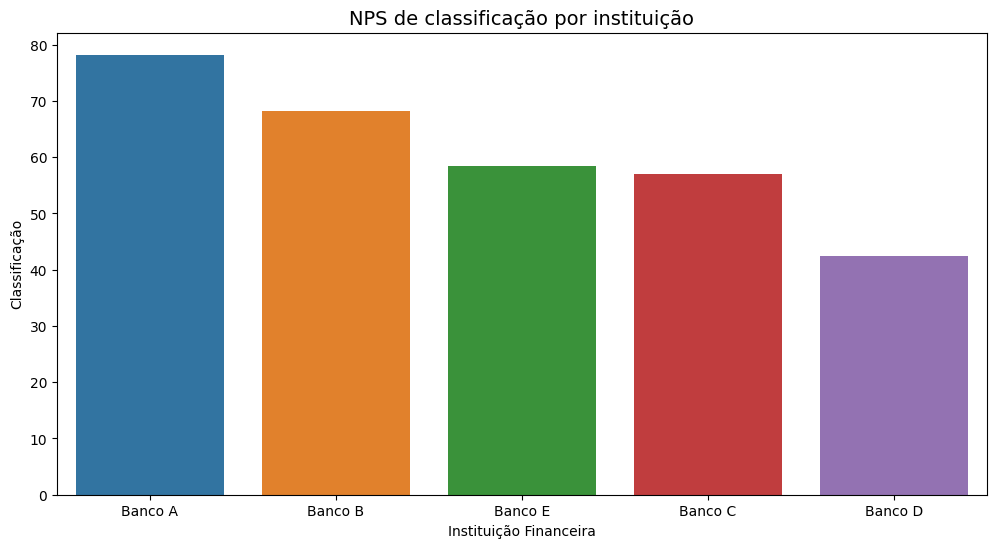

In [27]:
plt.figure(figsize = (12,6))
sns.barplot(nps_classificacao, x = 'Instituição', y = 'Classificação')
plt.title('NPS de classificação por instituição', loc = 'center', fontsize = 14)
plt.xlabel('Instituição Financeira')
plt.ylabel('Classificação')
plt.show()

### % de elogios do app para cada instituição

Como os dados da coluna 'Elogio_quanto_ao_app' são apenas dados 0 e 1, basta calcular a média dos dados dessa coluna, agrupados por Instituição.

In [28]:
elogios_app = clientes.groupby(by = 'Instituição')['Elogio_quanto_ao_app'].agg('mean').reset_index()
elogios_app['Elogio_quanto_ao_app'] = elogios_app['Elogio_quanto_ao_app']*100

In [29]:
elogios_app

,Instituição,Elogio_quanto_ao_app
0,Banco A,84.252874
1,Banco B,77.886272
2,Banco C,72.816092
3,Banco D,63.505747
4,Banco E,63.009765


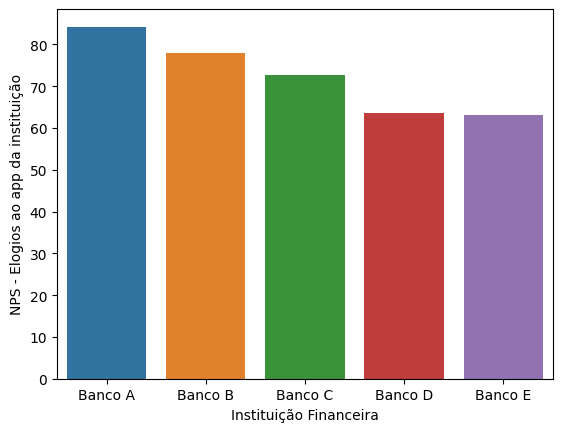

In [30]:
sns.barplot(elogios_app, x = 'Instituição', y = 'Elogio_quanto_ao_app')
plt.xlabel('Instituição Financeira')
plt.ylabel('NPS - Elogios ao app da instituição');

### % de reclamações do app para cada instituição

Resolvendo de forma semelhante ao método acima, agora utilizando-se a coluna 'Reclamação_quanto_ao_app',

In [31]:
reclamacoes_app = clientes.groupby(by = 'Instituição')['Reclamação_quanto_ao_app'].agg('mean').reset_index()
reclamacoes_app['Reclamação_quanto_ao_app'] = reclamacoes_app['Reclamação_quanto_ao_app']*100
reclamacoes_app

,Instituição,Reclamação_quanto_ao_app
0,Banco A,13.620690
1,Banco B,19.356692
2,Banco C,25.402299
3,Banco D,33.793103
4,Banco E,17.748420


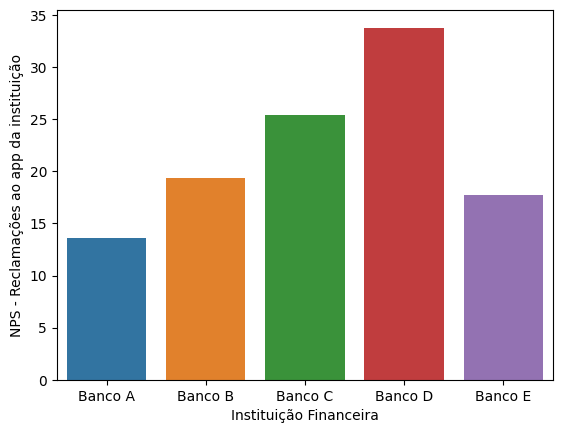

In [32]:
sns.barplot(reclamacoes_app, x = 'Instituição', y = 'Reclamação_quanto_ao_app')
plt.xlabel('Instituição Financeira')
plt.ylabel('NPS - Reclamações ao app da instituição');

### % de elogios a instituição para cada instituição

Analisando-se a coluna 'Elogio_a_Instituição',

In [33]:
elogios_inst = clientes.groupby(by = 'Instituição')['Elogio_a_Instituição'].agg('mean').reset_index()
elogios_inst['Elogio_a_Instituição'] = elogios_inst['Elogio_a_Instituição']*100
elogios_inst

,Instituição,Elogio_a_Instituição
0,Banco A,2.068966
1,Banco B,2.067777
2,Banco C,2.643678
3,Banco D,0.747126
4,Banco E,15.508329


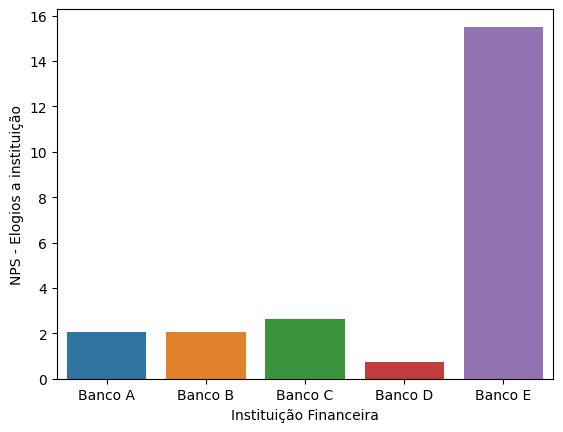

In [34]:
sns.barplot(elogios_inst, x = 'Instituição', y = 'Elogio_a_Instituição')
plt.xlabel('Instituição Financeira')
plt.ylabel('NPS - Elogios a instituição');

### % de reclamação a instituição para cada instituição

Por último, avalia-se a coluna 'Reclamação_a_Instituição',

In [35]:
reclamacao_inst = clientes.groupby(by = 'Instituição')['Reclamação_a_Instituição'].agg('mean').reset_index()
reclamacao_inst['Reclamação_a_Instituição'] = reclamacao_inst['Reclamação_a_Instituição']*100
reclamacao_inst

,Instituição,Reclamação_a_Instituição
0,Banco A,2.471264
1,Banco B,2.354968
2,Banco C,3.678161
3,Banco D,2.126437
4,Banco E,14.876508


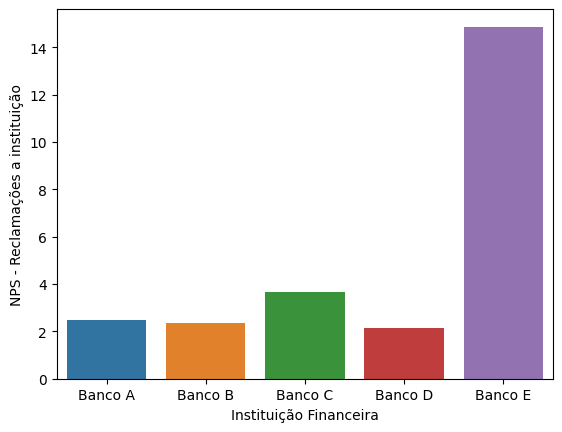

In [36]:
sns.barplot(reclamacao_inst, x = 'Instituição', y = 'Reclamação_a_Instituição')
plt.xlabel('Instituição Financeira')
plt.ylabel('NPS - Reclamações a instituição');

### Gráfico de linhas das classificações por instituição

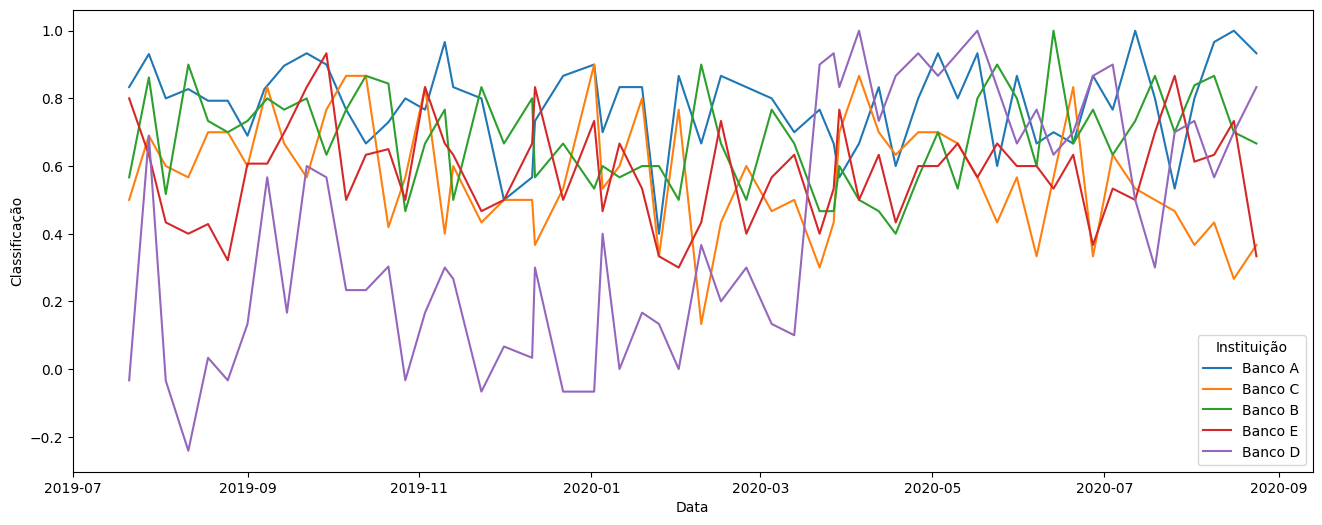

In [37]:
plt.figure(figsize = (16,6))
sns.lineplot(data = clientes, x = 'Data', y = 'Classificação', hue = 'Instituição', errorbar = None);

## Conclusão

Avaliando-se os gráficos de elogios e reclamções ao app para cada instituição financeira, é possível perceber que os resultados são condizentes com os resultados de NPS para classificação. O Banco A tem maior porcentagem em elogios ao app, menor porcentagem em reclamações ao app e por consequência um NPS de classificação com maior valor, se comparado as demais instituições.

Outro insight importante seria a relevância dos dados de cada um dos gráficos. Este ponto está intimamente ligado ao amostral abrangido em cada uma das métricas.

Avaliando-se os gráficos de elogios e reclamações as instituições, tem-se que o Banco E apresenta os maiores índices em ambos com 15% e 14% respectivamente, o que pode significar que os métodos utilizados para realizar as pesquisas de satisfação estão sendo minimamente eficazes pois os clientes estão participando.

Contudo, para as demais instituições, tem-se resultados, somando os dois gráficos, na faixa de 6%. Isto representa um percentual muito pequeno dos clientes. Portanto, é possível concluir que os métodos utilizados para fazer as pesquisas e coletar os dados estão sendo deficitários para estes casos.

Analisando-se ainda o gráfico das classificações por banco ao longo do tempo, fica mais claro uma constante variação das notas, principalmente do Banco D. Pensando em perspectivas futuras e estratégias a serem traçadas para esta instituição financeira, é importante avaliar quais foram as medidas tomadas e o que deu certo no maior pico encontrado no gráfico (entre março e maio de 2020) e também estudar o que deu errado para não se repetir o maior vale do gráfico (entre a metade de julho até Setembro de 2019).